## Univariate plotting with pandas

#### Pandas visualization

In this section we will learn the basic `pandas` plotting facilities, starting with the simplest type of visualizations: single variable or "univariate" visualizations. 

https://www.kaggle.com/residentmario/univariate-plotting-with-pandas/notebook

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
%matplotlib inline

In [43]:
reviews = pd.read_csv("/Users/danielruiz/Downloads/winemag-data_first150k.csv", index_col=0)
print("Shape of dataframe: " + str(reviews.shape))
reviews.head(5)

Shape of dataframe: (150930, 10)


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### Bar charts and categorical data

Bar charts map categories to numbers.

Here: Wine-producing provinces of the world (category) to the number of labels of wines they produce (number)

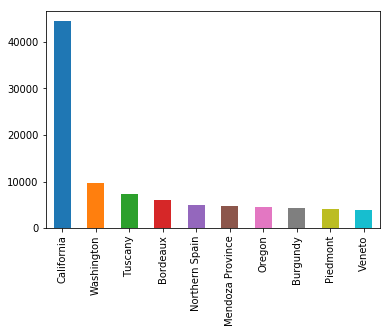

In [44]:
reviews['province'].value_counts().head(10).plot.bar()

Above plot tells us that California produces far more wine than any other province in the world. This tells us absolute numbers, but let's get proportions.

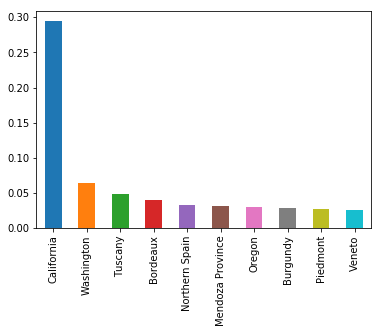

In [37]:
(reviews['province'].value_counts().head(10)/len(reviews)).plot.bar()

Above cases are **nominal categories**. "pure" categories that don't make a lot of sense in order. examples of nominal categories include: zip codes, countries, types of cheese. The other kind is **ordinal categories**: things that do make sense to compare, like earthquake magnitudes, weight of ppl.

In our case, the number of reviews of a certain score (points) alloted by Wine Magazine 

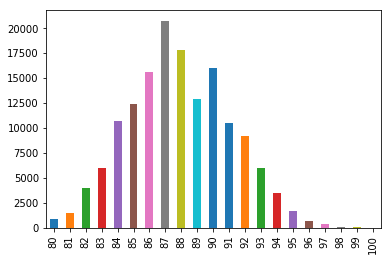

In [33]:
reviews['points'].value_counts().sort_index().plot.bar()

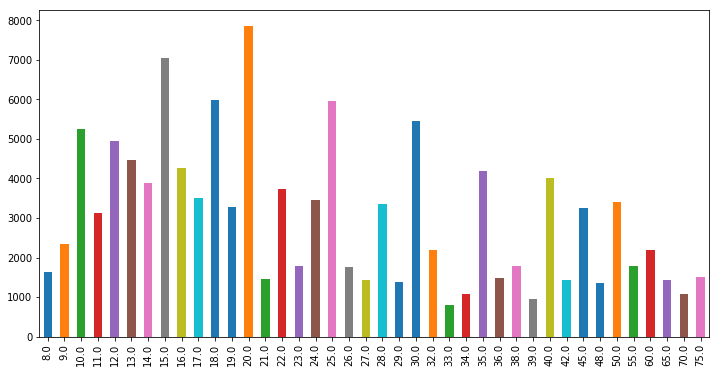

In [60]:
reviews['price'].value_counts().head(40).sort_index().plot.bar(figsize=(12, 6))

## Bivariate plotting with pandas

https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas

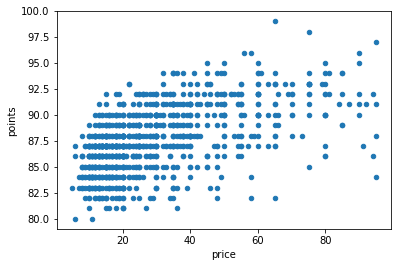

In [59]:
# scatter plot

reviews[reviews['price'] < 100].sample(1000).plot.scatter(x='price', y='points')

## Plotting with seaborn

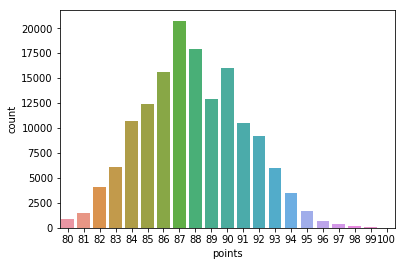

In [63]:
sns.countplot(reviews['points'])

### Boxplot and violin plot

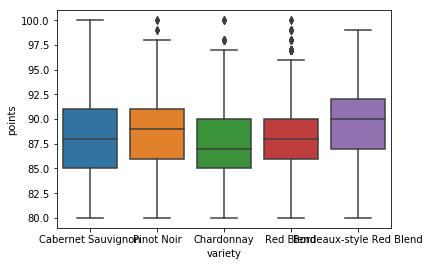

In [66]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(x='variety',
           y='points',
           data=df)

## Telco - Exploratory Analysis 

The data was downloaded from IBM Sample Data Sets. 
https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/ 

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Notebook:** https://www.kaggle.com/bbatista/telco-exploratory-analysis/data

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

In [69]:
df = pd.read_csv("/Users/danielruiz/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [71]:
print("Shape of dataframe: " + str(df.shape))
df.head(10)

Shape of dataframe: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#### Get data types for each column

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [73]:
# convert 'SeniorCitizen' to object

df['SeniorCitizen'] = df.SeniorCitizen.astype('object')

In [75]:
# convert 'TotalCharges' to numerical

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

# The _errors = 'coerce'_ parameter turns the records into which the conversion 
#  could not be converted to values of type NaN.

df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [78]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### The conversion generated 11 null values in TotalCharges

Let's fill in those 11 NA's with a calculated variable (TotalCharges = MonthlyCharges * tenure)

In [80]:
df.TotalCharges.fillna(value = df.MonthlyCharges * df.tenure, inplace=True)

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Statistical summary of the numerical variables

In [82]:
df.describe().round()

,tenure,MonthlyCharges,TotalCharges
count,7043.0,7043.0,7043.0
mean,32.0,65.0,2280.0
std,25.0,30.0,2267.0
min,0.0,18.0,0.0
25%,9.0,36.0,399.0
50%,29.0,70.0,1395.0
75%,55.0,90.0,3787.0
max,72.0,119.0,8685.0


### Summary of categorical variables

In [83]:
df.describe(include = 'object')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3389-YGYAI,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


#### Does age group influence customer churn?

In [84]:
pd.crosstab(df.Churn, df.SeniorCitizen, margins=True)

SeniorCitizen,0,1,All
Churn,,,
No,4508,666,5174
Yes,1393,476,1869
All,5901,1142,7043


In [130]:
print('SeniorCitizen churn rate: {}%'.format(476/1142*100))
print('Non SeniorCitizen churn rate: {}%'.format(1393/5901*100)) 

SeniorCitizen churn rate: 41.68126094570928%
Non SeniorCitizen churn rate: 23.606168446026096%


#### Plot churn by Senior Citizen 0/1

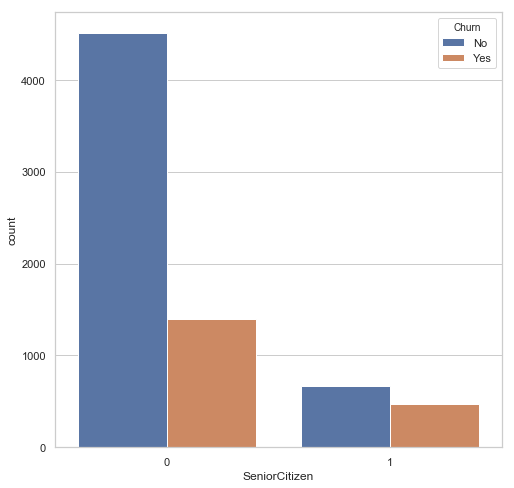

In [131]:
plt.figure(figsize=(8,8))
sns.set(style='whitegrid')

sns.countplot(df.SeniorCitizen, hue=df.Churn)

#### Mean monlthy spend SeniorCitizen 0/1

In [136]:
sc_spend = df[df['SeniorCitizen'] == 1]
sc_spend = sc_spend.MonthlyCharges.mean()
sc_spend

non_sc_spend = df[df['SeniorCitizen'] == 0]
non_sc_spend = non_sc_spend.MonthlyCharges.mean()
non_sc_spend

print("Avg monthly spend for SeniorCitizen is: {}".format(sc_spend))
print("Avg monthly spend for Non SeniorCitizen is: {}".format(non_sc_spend))

Avg monthly spend for SeniorCitizen is: 79.82035901926446
Avg monthly spend for Non SeniorCitizen is: 61.847441111675984


#### % of customer who are SeniorCitizen

In [137]:
df.SeniorCitizen.value_counts(normalize=True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

### Senior Citizen analysis Summary
Senior Citizen make up a smaller proportion of customers, yet spend more monthly. An also have a higher churn rate than non-Senior Citizens

#### Gender analysis

In [139]:
df.groupby(by = 'gender')['TotalCharges', 'MonthlyCharges', 'tenure'].mean().round()

,TotalCharges,MonthlyCharges,tenure
gender,,,
Female,2280.0,65.0,32.0
Male,2280.0,64.0,32.0


### Gender analysis Summary

No difference by gender.

### Partner analysis

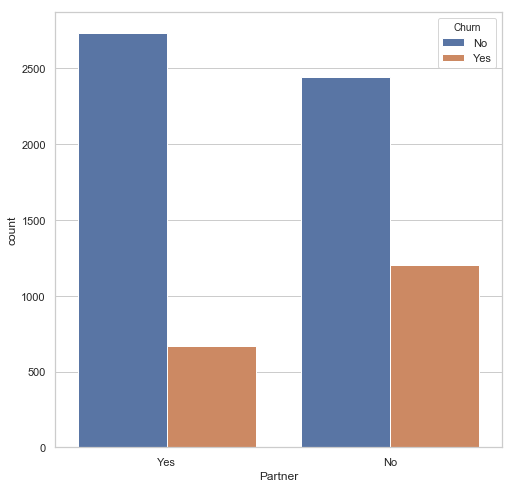

In [141]:
plt.figure(figsize=(8,8))
sns.set(style='whitegrid')
sns.countplot(df.Partner, hue=df.Churn)

In [143]:
df.groupby('Partner')['TotalCharges', 'MonthlyCharges', 'tenure'].mean()

,TotalCharges,MonthlyCharges,tenure
Partner,,,
No,1584.089810,61.945001,23.357869
Yes,3024.249765,67.776264,42.017637


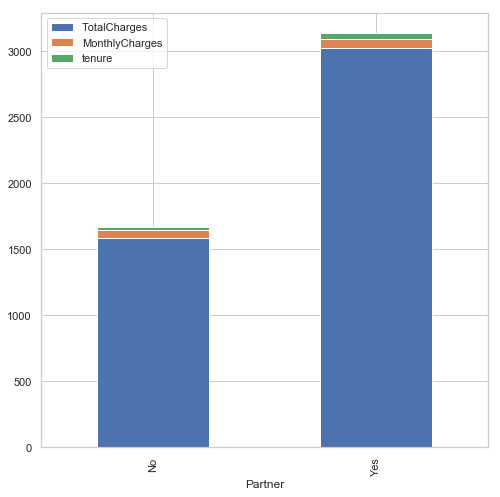

In [144]:
df.groupby('Partner')['TotalCharges', 'MonthlyCharges', 'tenure'].mean().plot(kind='bar', stacked=True, figsize=(8,8))

Customers with partners spend more.

#### Does partner status influence churn?

In [145]:
pd.crosstab(df.Churn, df.Partner, margins=True)

Partner,No,Yes,All
Churn,,,
No,2441,2733,5174
Yes,1200,669,1869
All,3641,3402,7043


In [149]:
print('With Partner churn rate: {}%'.format(669/3402*100))
print('Without Partner churn rate: {}%'.format(1200/3641*100)) 

With Partner churn rate: 19.66490299823633%
Without Partner churn rate: 32.95797857731392%


#### Without Partner has higher churn rate.

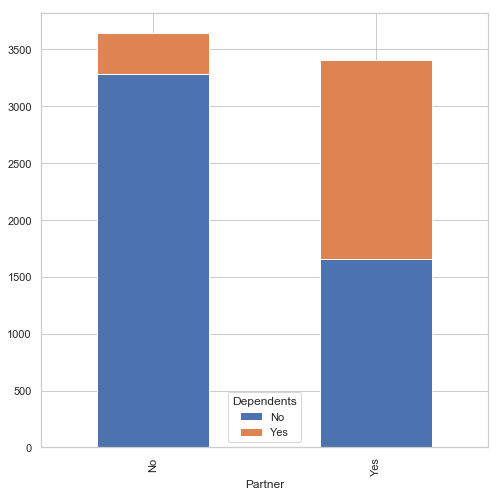

In [152]:
pd.crosstab(df.Partner, df.Dependents).plot(kind='bar', stacked=True, figsize=(8,8))

Customers with partners tend to have more dependents (children).

#### Check partner varialbe against tenure

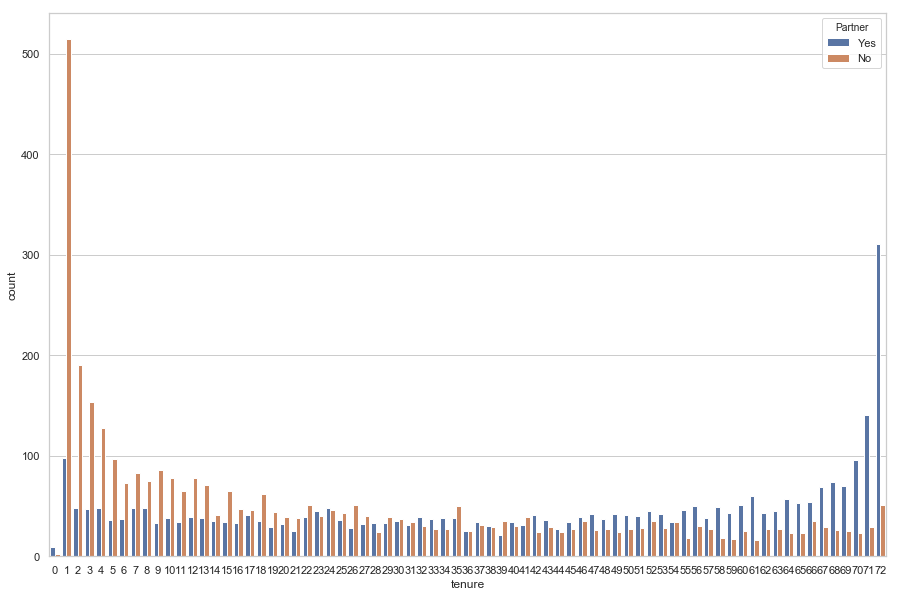

In [153]:
plt.figure(figsize = (15,10))
sns.countplot(df['tenure'], hue = df.Partner)

**Summary:** Customers with Partners tend to have longer tenure than those with out. 

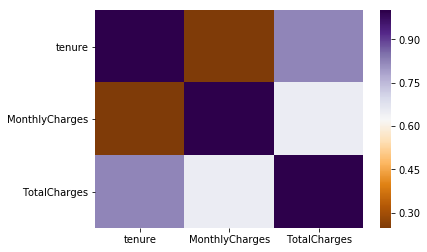

In [89]:

# Calculate correlation between each pair of variable
corr_matrix=df.corr()
 
# plot it
sns.heatmap(corr_matrix, cmap='PuOr')
#sns.plt.show()


In [ ]:
# find shape and examine df
print("Shape of dataframe: " + str(df.shape))
df.head(10)

# data types of columns
df.info()

# convert object type example
df['SeniorCitizen'] = df.SeniorCitizen.astype('object')

# convert from object to numeric. errors = 'coerce' turns records that can't be converted to type NaN
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

# check for Nan's
df.isnull().sum()

# drop Nan's
df = df.dropna()

# drop duplicates
df = df.drop_duplicates(subset=['Body', 'Title', 'label', 'Body_processed', 'Title_processed'], keep=False)
df = df.drop_duplicates()

# fill na example (calculated variable)
df.TotalCharges.fillna(value = df.MonthlyCharges * df.tenure, inplace=True)

# check for outliers

# summary for numerical variables
df.describe().round()

# summary for categorical variables
df.describe(include = 'object')

# get proportions % of a particular variable
df.SeniorCitizen.value_counts(normalize=True)

# crosstab. ex: does SeniorCitizen influence Churn
pd.crosstab(df.Churn, df.SeniorCitizen, margins=True)

# plots (univariate, bi variate, multi variate)s

# bar plot example
df['PaymentMethod'].value_counts().head(10).plot.bar()

# corr matrix (pearson is used by default.  Pearson correlation measures the linear association between continuous variables
# coefficients sensitive to outliers, relies on means and sd's)
df.corr()

# pair plot. only use numeric vars
sns.pairplot(df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], kind='reg', hue='Churn')





Will not build model because experience tells me modeling is only a minor piece of the puzzle.

Understanding the business problem and clearly outlining goals and KPI's is more important and takes more thoughtful thinking. Depending on the data, clever feature engineering can be very useful for insights and model features.

Look for balanced data. >15% for one class becomes harder to model. Solution: oversample or downsample. Cannot use 'accuracy' as evaluation metric with unbalanced data.

#### Featuretools

https://github.com/Featuretools/Automated-Manual-Comparison/blob/master/Retail%20Spending/notebooks/Automated%20Retail%20Spending.ipynb

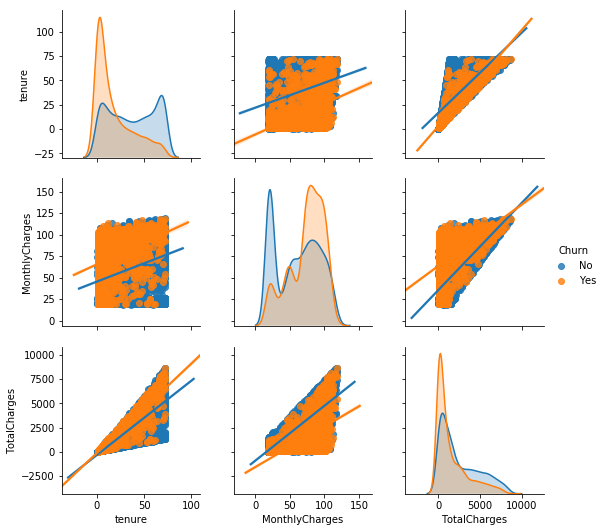

In [113]:
sns.pairplot(df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], kind='reg', hue='Churn')

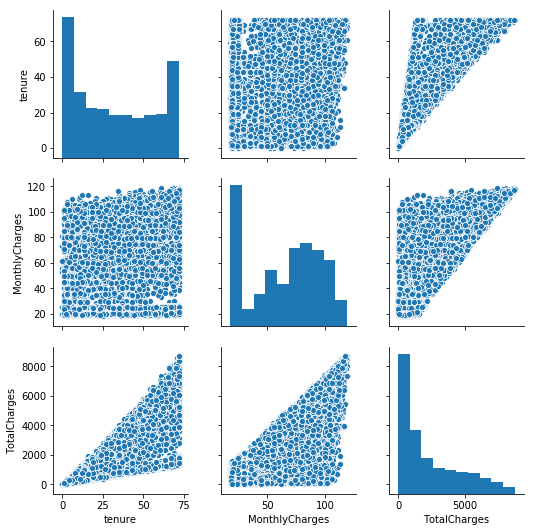

In [129]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [119]:
df.SeniorCitizen.value_counts(normalize=True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

In [123]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


In [102]:
df[:0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [103]:
df.iloc[:0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
